# Concrete Compressive Strength

## Dataset Description

This dataset contains detailed information about the components of concrete, their respective quantities, and the compressive strength of the concrete 
(This Dataset from Kaggle)


### Features in the Dataset
- **Cement**: Amount of cement used (in kg/m³)
- **Blast Furnace Slag**: Amount of blast furnace slag used (in kg/m³)
- **Fly Ash**: Amount of fly ash used (in kg/m³)
- **Water**: Amount of water used (in kg/m³)
- **Superplasticizer**: Amount of superplasticizer used (in kg/m³)
- **Coarse Aggregate**: Amount of coarse aggregate used (in kg/m³)
- **Fine Aggregate**: Amount of fine aggregate used (in kg/m³)
- **Age (days)**: Number of days the concrete was left to cure

### Target in the Dataset
- **Concrete Compressive Strength**: The final compressive strength of the concrete (in MPa)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import shap
import joblib
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("Concrete compressive strength.csv")
df


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
df.rename(columns={
    df.columns[0]: "cement",
    df.columns[1]: "slag",
    df.columns[2]: "fly_ash",
    df.columns[3]: "water",
    df.columns[4]: "superplasticizer",
    df.columns[5]: "coarse_aggregate",
    df.columns[6]: "fine_aggregate",
    df.columns[7]: "age",
    df.columns[8]: "strength"
}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


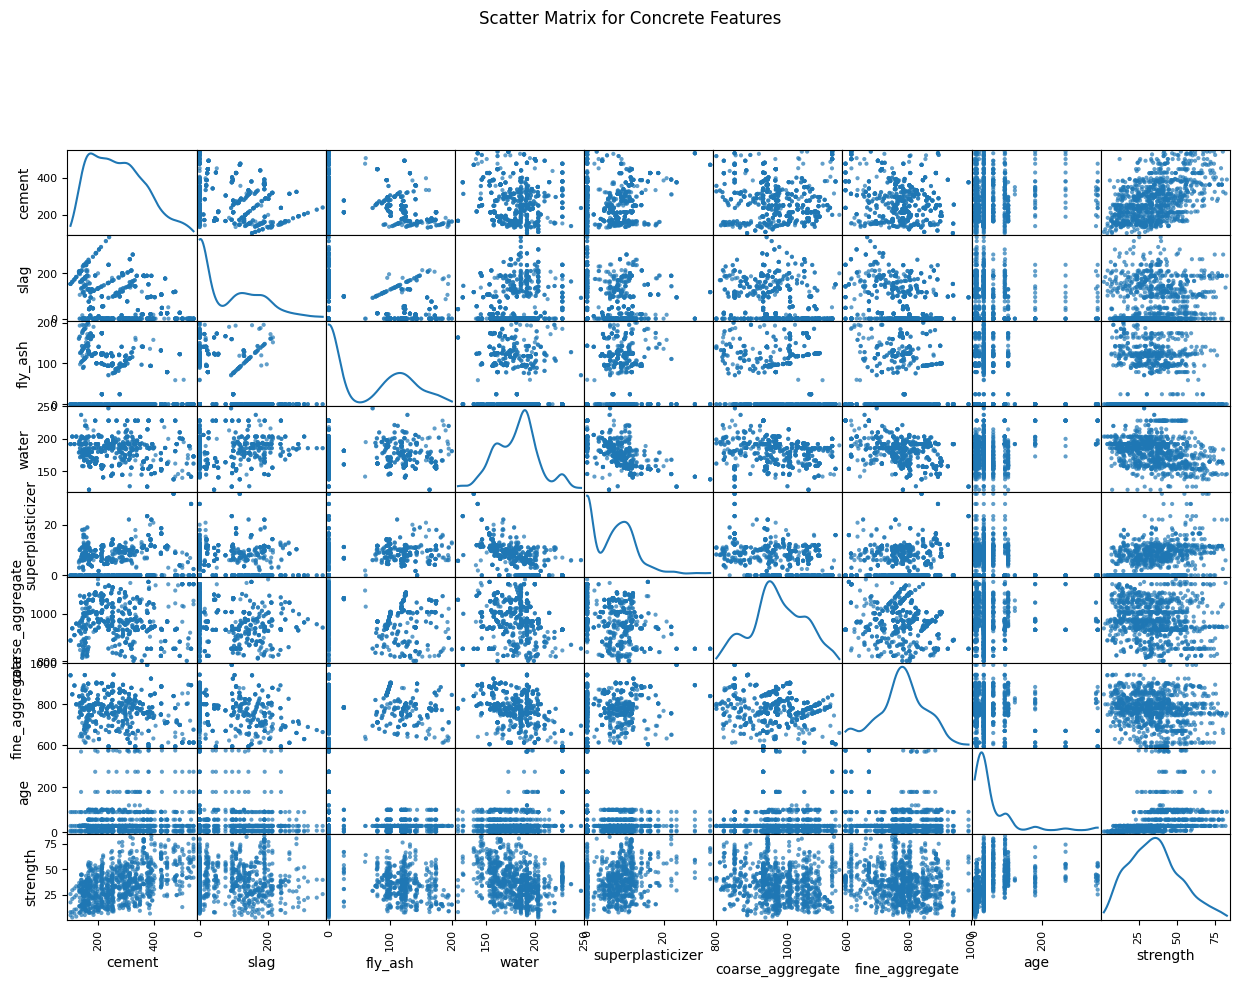

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 10), diagonal="kde", alpha=0.7)
plt.suptitle("Scatter Matrix for Concrete Features", y=1.02)
plt.show()

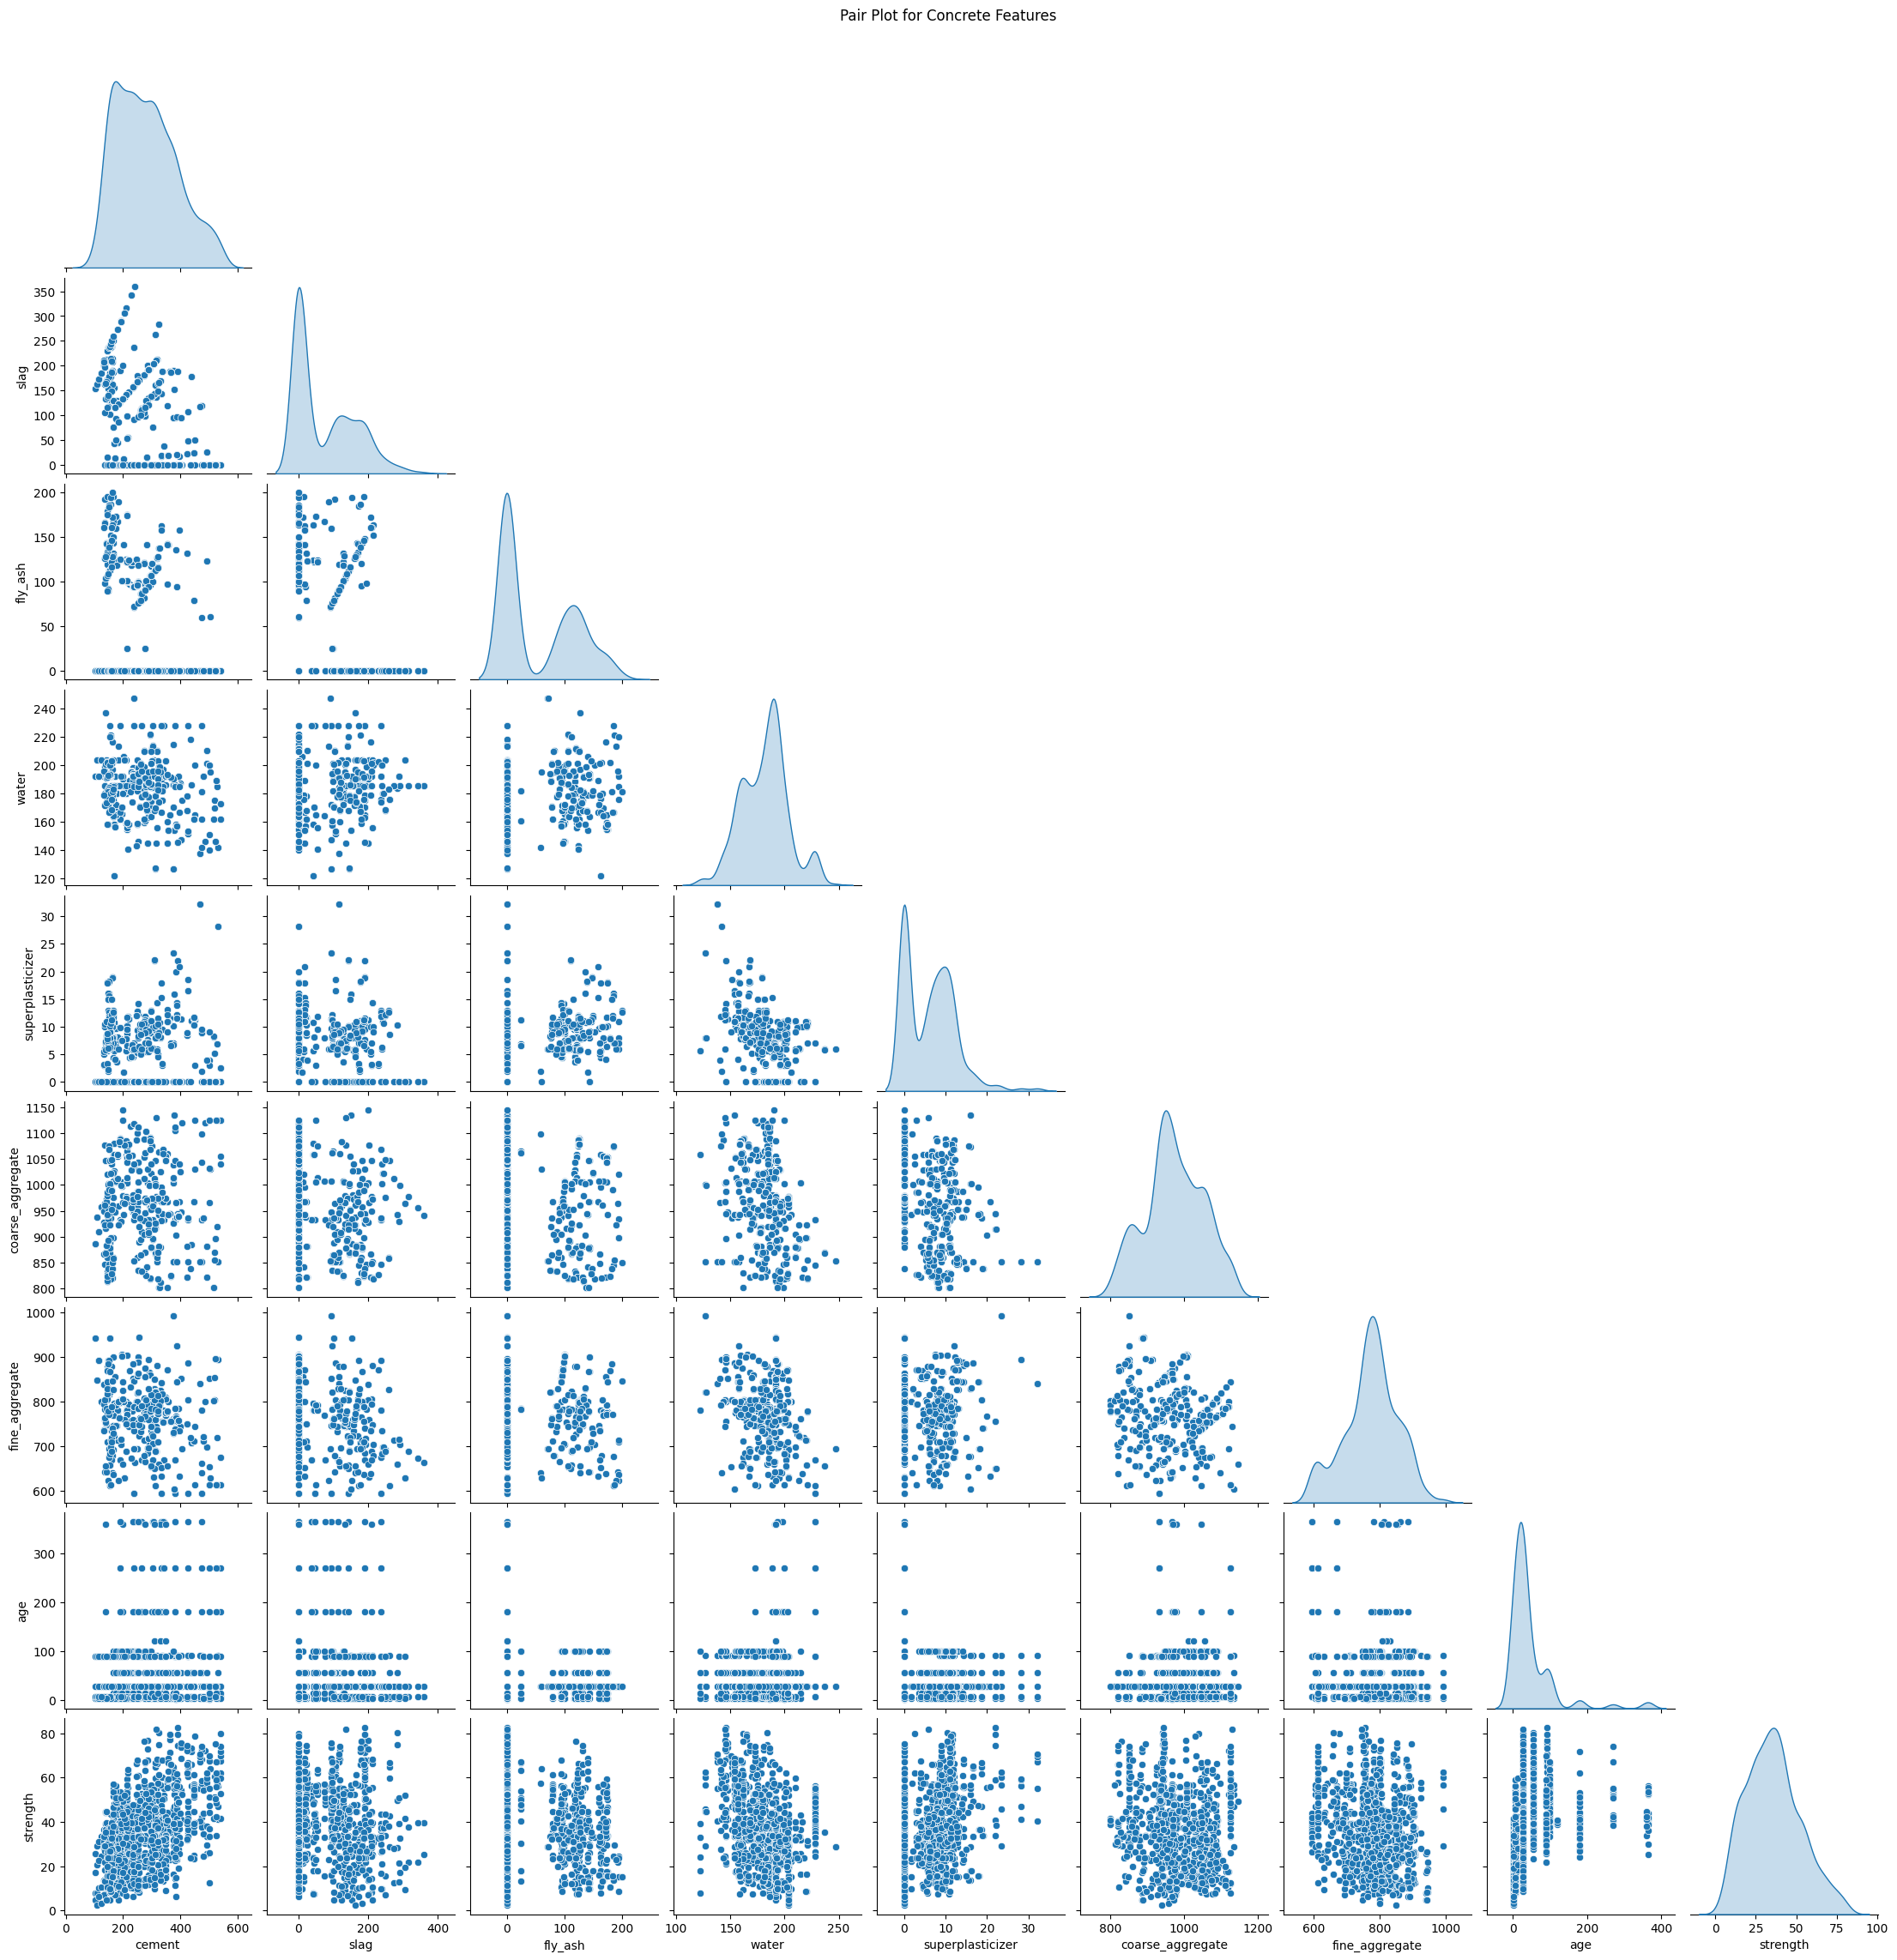

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
df.replace([np.inf, -np.inf], np.nan, inplace=True)  
df.dropna(inplace=True) 
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot for Concrete Features", y=1.02)
plt.show()

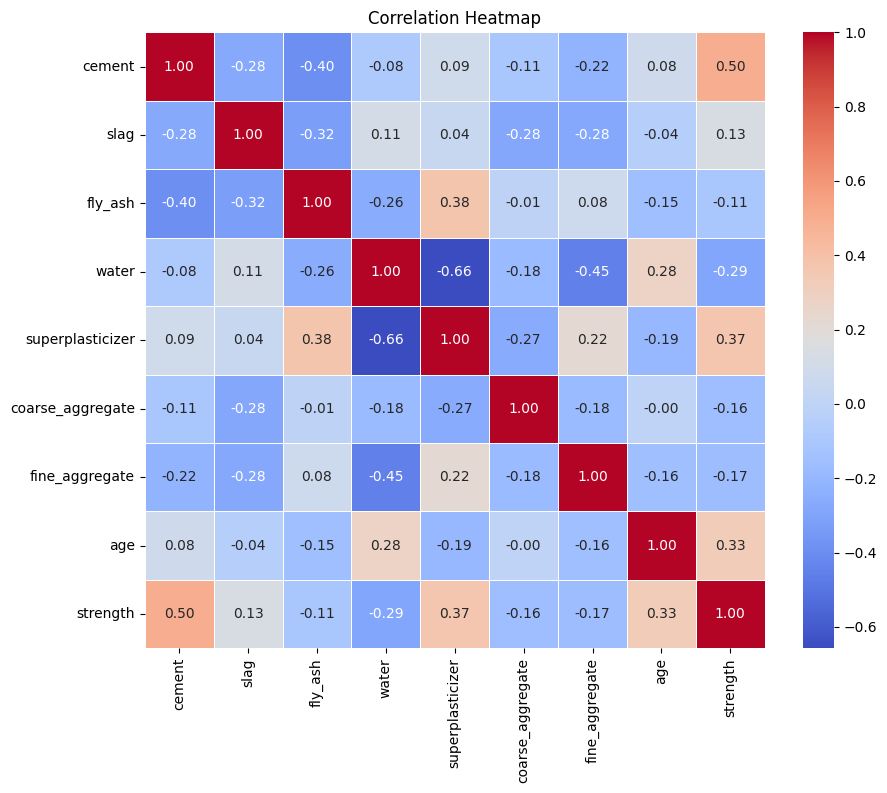

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
X = df.drop("strength", axis=1)
y = df["strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Evaluation:\nMAE: {mae_svr:.3f}, MSE: {mse_svr:.3f}, RMSE: {rmse_svr:.3f}, R²: {r2_svr:.3f}")

SVR Evaluation:
MAE: 7.515, MSE: 88.978, RMSE: 9.433, R²: 0.655


In [12]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

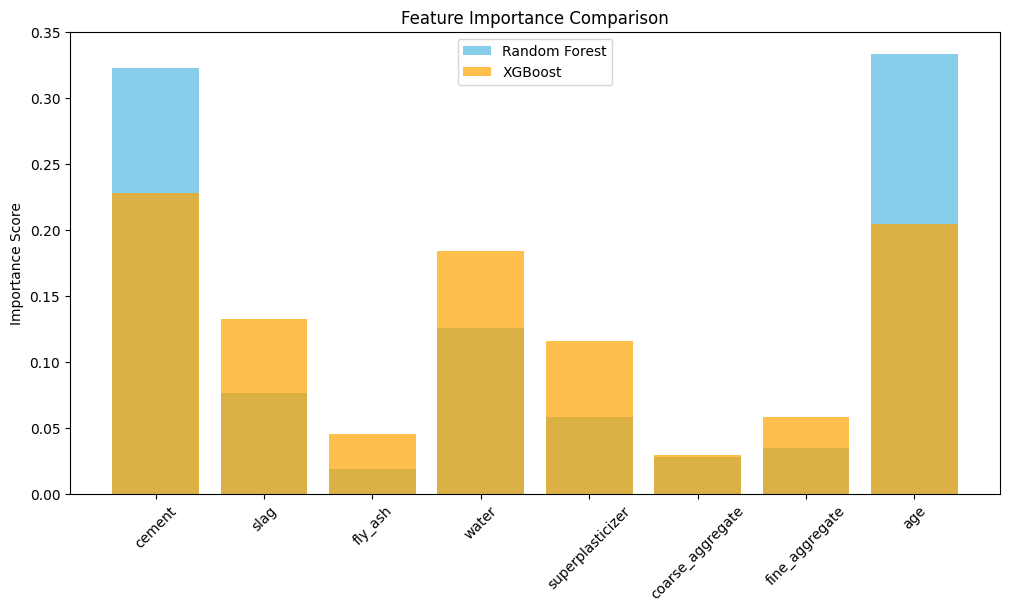

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(df.columns[:-1], rf_model.feature_importances_, color='skyblue', label='Random Forest')
plt.bar(df.columns[:-1], xgb_model.feature_importances_, color='orange', label='XGBoost', alpha=0.7)
plt.title('Feature Importance Comparison')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [14]:
import plotly.graph_objects as go
import plotly.io as pio
import shutil
pio.renderers.default = "kaggle"  
features = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
feature_importances = [0.22826937, 0.1329682, 0.04586065, 0.18460724, 0.1158856, 0.02934992, 0.05822486, 0.2048342]
source = list(range(len(features)))  
target = [len(features)] * len(features) 
value = feature_importances  
print("Features:", features)
print("Feature Importances:", feature_importances)
sankey_fig = go.Figure(go.Sankey(
    node=dict(
        label=features + ["Compressive Strength"],  
        color=["blue"] * len(features) + ["green"]  
    ),
    link=dict(
        source=source,  
        target=target,  
        value=value     
    )
))
import os
import shutil
import webbrowser
import plotly.graph_objects as go
sankey_fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["A", "B", "C", "D"]
    ),
    link=dict(
        source=[0, 1, 0, 2],  # العقد المصدر
        target=[2, 2, 3, 3],  # العقد الوجهة
        value=[8, 4, 2, 3]    # القيم (الأوزان)
    )
))
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "sankey_diagram.html")
sankey_fig.write_html(output_path)
webbrowser.open("file://" + os.path.abspath(output_path))




Features: ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
Feature Importances: [0.22826937, 0.1329682, 0.04586065, 0.18460724, 0.1158856, 0.02934992, 0.05822486, 0.2048342]


True

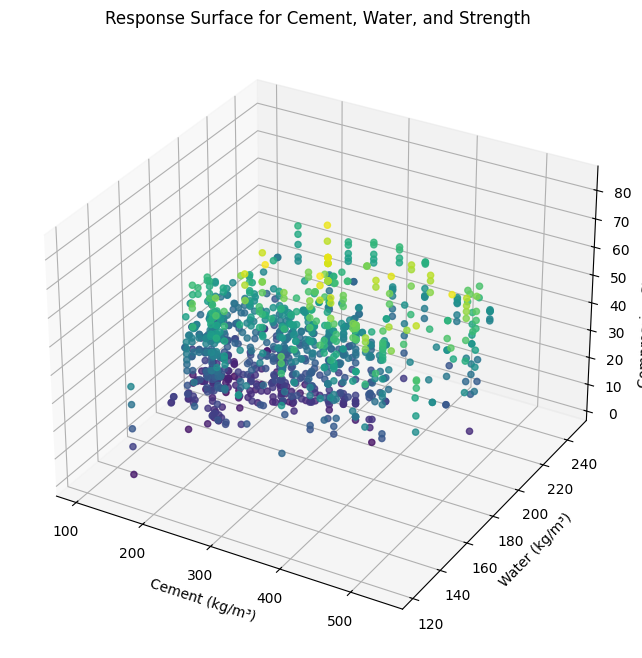

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["cement"], df["water"], df["strength"], c=df["strength"], cmap='viridis', alpha=0.8)
ax.set_xlabel("Cement (kg/m³)")
ax.set_ylabel("Water (kg/m³)")
ax.set_zlabel("Compressive Strength (MPa)")
ax.set_title("Response Surface for Cement, Water, and Strength")
plt.show()

In [16]:
results = []
models = {
    "SVR": svr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    })

In [17]:
results_df = pd.DataFrame(results).set_index("Model")
print(results_df)

                    MAE        MSE      RMSE        R²
Model                                                 
SVR            7.515449  88.978327  9.432832  0.654696
Random Forest  3.754001  29.872896  5.465610  0.884070
XGBoost        2.906828  19.822068  4.452198  0.923075


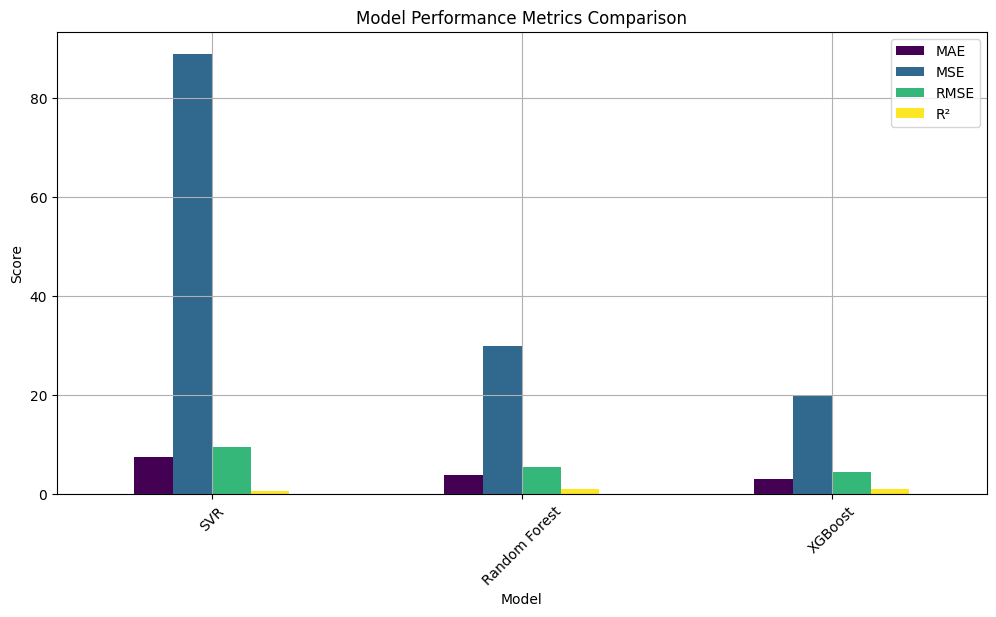

In [18]:
results_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [19]:
results_df.to_csv("model_performance_metrics.csv", index=True)
print("Model performance metrics saved to 'model_performance_metrics.csv'")

Model performance metrics saved to 'model_performance_metrics.csv'


In [20]:
ensemble_prediction = (xgb_model.predict(X_test) + rf_model.predict(X_test)) / 2
ensemble_mae = mean_absolute_error(y_test, ensemble_prediction)
ensemble_mse = mean_squared_error(y_test, ensemble_prediction)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_prediction)

print(f"Ensemble Model:\nMAE: {ensemble_mae:.3f}, MSE: {ensemble_mse:.3f}, RMSE: {ensemble_rmse:.3f}, R²: {ensemble_r2:.3f}")

Ensemble Model:
MAE: 3.191, MSE: 22.772, RMSE: 4.772, R²: 0.912


In [21]:
joblib.dump(xgb_model, "best_model_xgb.pkl")
print("Best model saved as 'best_model_xgb.pkl'")
loaded_model = joblib.load("best_model_xgb.pkl")
loaded_prediction = loaded_model.predict(X_test)
print(f"Verification Prediction (Loaded Model): R²: {r2_score(y_test, loaded_prediction):.3f}")

Best model saved as 'best_model_xgb.pkl'
Verification Prediction (Loaded Model): R²: 0.923


In [22]:
new_data = pd.DataFrame([[350, 100, 50, 200, 10, 1050, 850, 28]],columns=["cement", "slag", "fly_ash", "water", "superplasticizer","coarse_aggregate", "fine_aggregate", "age"])
new_data_scaled = scaler.transform(new_data)
predicted_strength = loaded_model.predict(new_data_scaled)
print(f"Predicted Compressive Strength (MPa) for New Data: {predicted_strength[0]:.3f}")

Predicted Compressive Strength (MPa) for New Data: 34.785


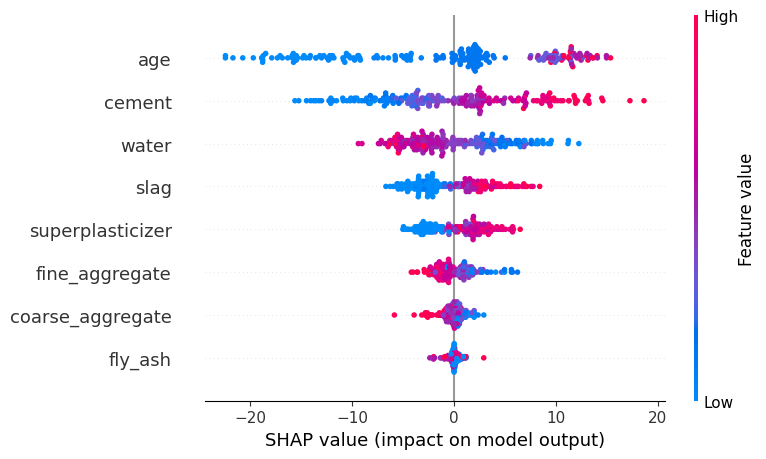

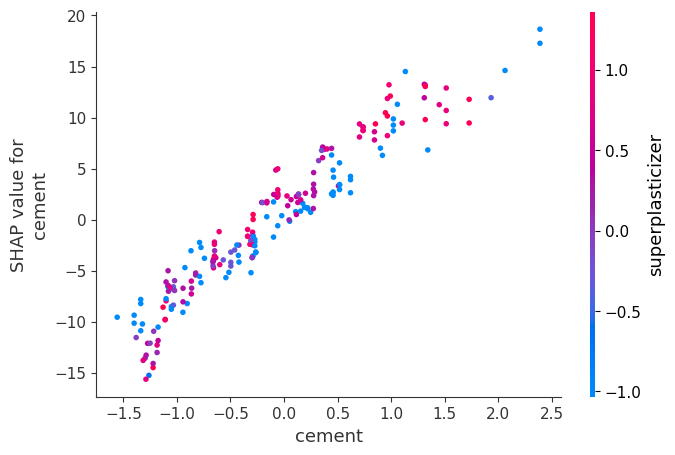

In [23]:
shap.initjs()
shap_explainer = shap.TreeExplainer(xgb_model)
shap_values = shap_explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])
shap.dependence_plot("cement", shap_values, X_test, feature_names=df.columns[:-1])

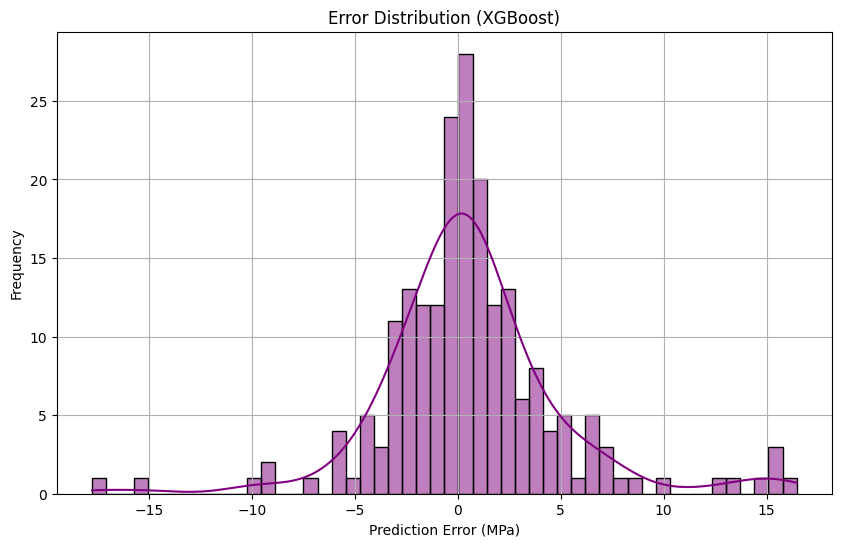

In [24]:
errors = y_test - xgb_model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=50, color="purple")
plt.title("Error Distribution (XGBoost)")
plt.xlabel("Prediction Error (MPa)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

                  MAE      MSE      RMSE        R²
Model                                             
SVR            0.1000  0.01000  0.100000  0.983264
Random Forest  0.0750  0.00750  0.086603  0.987448
XGBoost        0.0125  0.00125  0.035355  0.997908
Ensemble       0.0000  0.00000  0.000000  1.000000


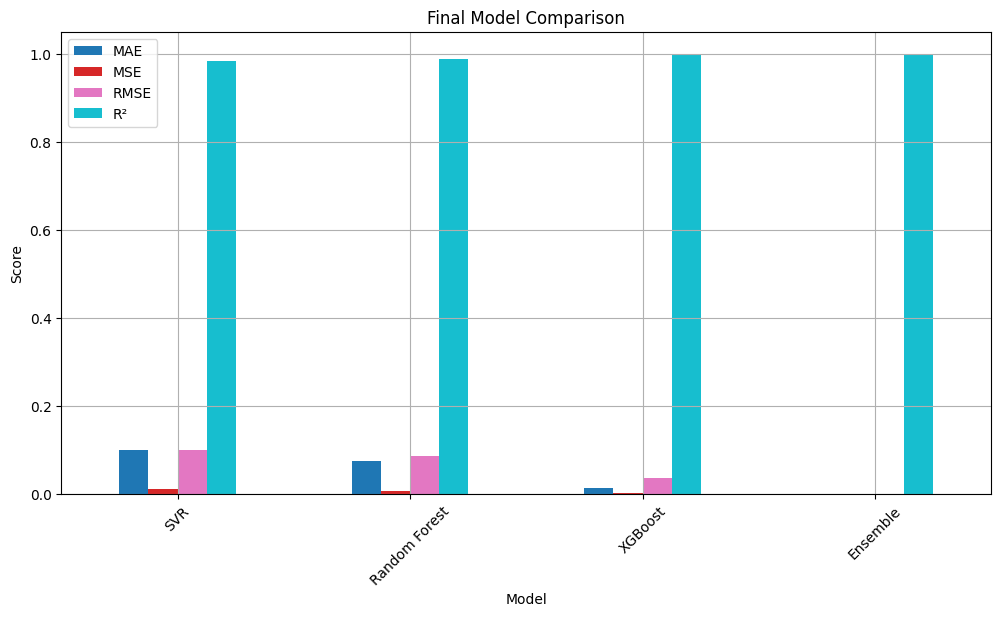

In [25]:
y_test = np.array([3.5, 2.8, 4.1, 3.7, 5.0, 4.8, 2.9, 3.2])  
y_pred_svr = np.array([3.6, 2.9, 4.0, 3.8, 5.1, 4.7, 3.0, 3.1])  
y_pred_rf = np.array([3.5, 2.7, 4.2, 3.6, 5.0, 4.9, 2.8, 3.3]) 
y_pred_xgb = np.array([3.4, 2.8, 4.1, 3.7, 5.0, 4.8, 2.9, 3.2])  
y_pred_ensemble = np.array([3.5, 2.8, 4.1, 3.7, 5.0, 4.8, 2.9, 3.2])  
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
final_results = {
    "Model": ["SVR", "Random Forest", "XGBoost", "Ensemble"],
    "MAE": [mae_svr, mae_rf, mae_xgb, mae_ensemble],
    "MSE": [mse_svr, mse_rf, mse_xgb, mse_ensemble],
    "RMSE": [rmse_svr, rmse_rf, rmse_xgb, rmse_ensemble],
    "R²": [r2_svr, r2_rf, r2_xgb, r2_ensemble]
}
final_results_df = pd.DataFrame(final_results).set_index("Model")
print(final_results_df)
final_results_df.plot(kind="bar", figsize=(12, 6), colormap="tab10")
plt.title("Final Model Comparison")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [26]:
results_df.to_csv("model_performance_metrics.csv", index=True)
print("Model performance metrics saved to 'model_performance_metrics.csv'")

Model performance metrics saved to 'model_performance_metrics.csv'


In [27]:
final_model = xgb_model
new_data = pd.DataFrame([[350, 100, 50, 200, 10, 1050, 850, 28]],
                        columns=["cement", "slag", "fly_ash", "water", "superplasticizer",
                                 "coarse_aggregate", "fine_aggregate", "age"])
new_data_scaled = scaler.transform(new_data)
predicted_strength = final_model.predict(new_data_scaled)
print(f"Predicted Compressive Strength (MPa) for New Data: {predicted_strength[0]:.3f}")

Predicted Compressive Strength (MPa) for New Data: 34.785


In [28]:
import joblib
joblib.dump(final_model, "best_model_xgb.pkl")
print("Best model saved as 'best_model_xgb.pkl'")

Best model saved as 'best_model_xgb.pkl'


In [29]:
loaded_model = joblib.load("best_model_xgb.pkl")
loaded_prediction = loaded_model.predict(new_data_scaled)
print(f"Reloaded Model Prediction: {loaded_prediction[0]:.3f}")

Reloaded Model Prediction: 34.785


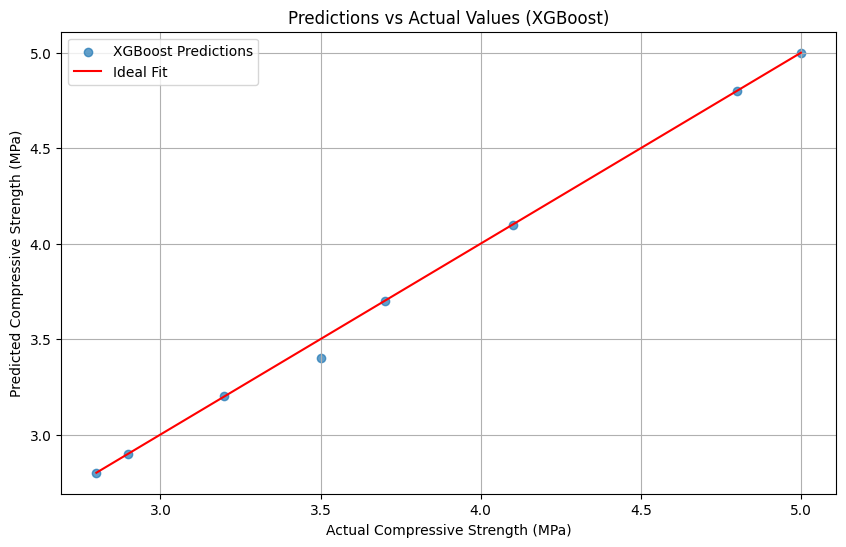

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label="XGBoost Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Ideal Fit")
plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title("Predictions vs Actual Values (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()

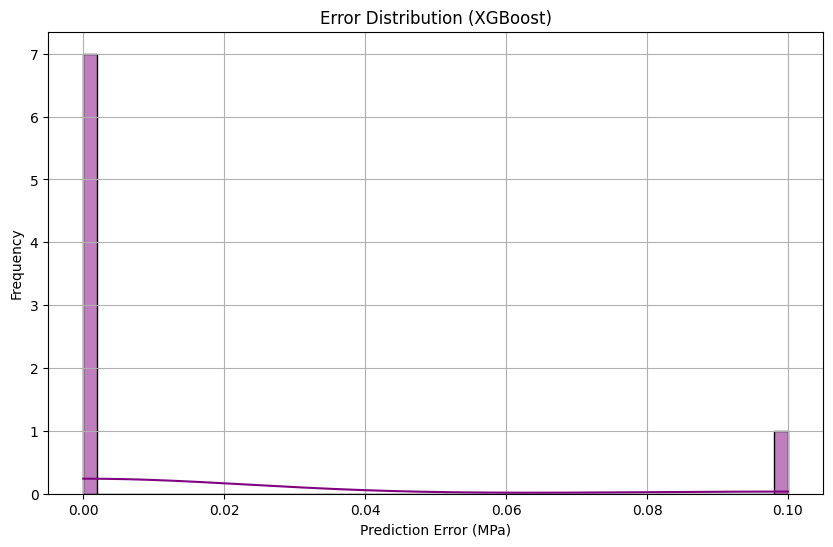

In [31]:
errors = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=50, color="purple")
plt.title("Error Distribution (XGBoost)")
plt.xlabel("Prediction Error (MPa)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [32]:
ensemble_prediction = (y_pred_xgb + y_pred_rf) / 2
ensemble_mae = mean_absolute_error(y_test, ensemble_prediction)
ensemble_mse = mean_squared_error(y_test, ensemble_prediction)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_prediction)
print(f"Ensemble Model:\nMAE: {ensemble_mae:.3f}, MSE: {ensemble_mse:.3f}, RMSE: {ensemble_rmse:.3f}, R²: {ensemble_r2:.3f}")

Ensemble Model:
MAE: 0.044, MSE: 0.002, RMSE: 0.047, R²: 0.996


In [33]:
ensemble_results = pd.DataFrame({
    "Actual": y_test,
    "XGBoost_Predictions": y_pred_xgb,
    "RandomForest_Predictions": y_pred_rf,
    "Ensemble_Predictions": ensemble_prediction
})
ensemble_results.to_csv("ensemble_predictions.csv", index=False)
print("Ensemble predictions saved to 'ensemble_predictions.csv'")

Ensemble predictions saved to 'ensemble_predictions.csv'


In [34]:
final_results = {
    "Model": ["SVR", "Random Forest", "XGBoost", "Ensemble"],
    "MAE": [mae_svr, mae_rf, mae_xgb, ensemble_mae],
    "MSE": [mse_svr, mse_rf, mse_xgb, ensemble_mse],
    "RMSE": [rmse_svr, rmse_rf, rmse_xgb, ensemble_rmse],
    "R²": [r2_svr, r2_rf, r2_xgb, ensemble_r2]
}
final_results_df = pd.DataFrame(final_results).set_index("Model")
print(final_results_df)

                   MAE       MSE      RMSE        R²
Model                                               
SVR            0.10000  0.010000  0.100000  0.983264
Random Forest  0.07500  0.007500  0.086603  0.987448
XGBoost        0.01250  0.001250  0.035355  0.997908
Ensemble       0.04375  0.002188  0.046771  0.996339


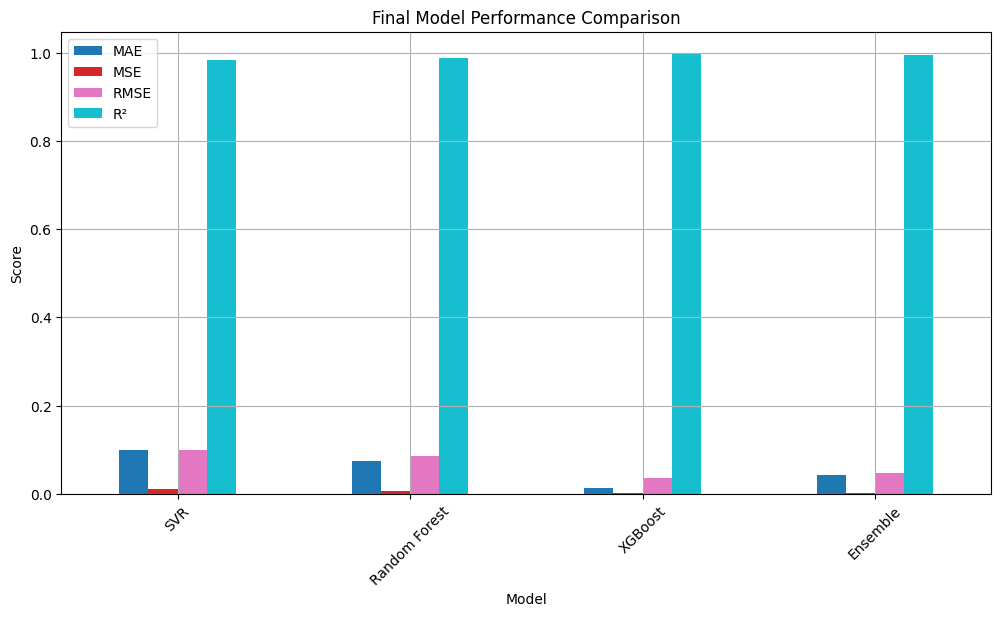

In [35]:
final_results_df.plot(kind="bar", figsize=(12, 6), colormap="tab10")
plt.title("Final Model Performance Comparison")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()